In [43]:
import pandas as pd
data = pd.read_csv('apple_stock_data.csv')

In [44]:
print(data.head(2))

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  17.253258   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  16.874277   

      Volume  
0  234684800  
1  392467600  


In [45]:
data.tail(2)

,Date,Open,High,Low,Close,Adj Close,Volume
2707,2024-10-04,227.899994,228.000000,224.130005,226.800003,226.800003,37245100
2708,2024-10-07,224.500000,225.690002,221.330002,221.690002,221.690002,39505400


C:\Users\janan\AppData\Local\Temp\ipykernel_12672\656183241.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


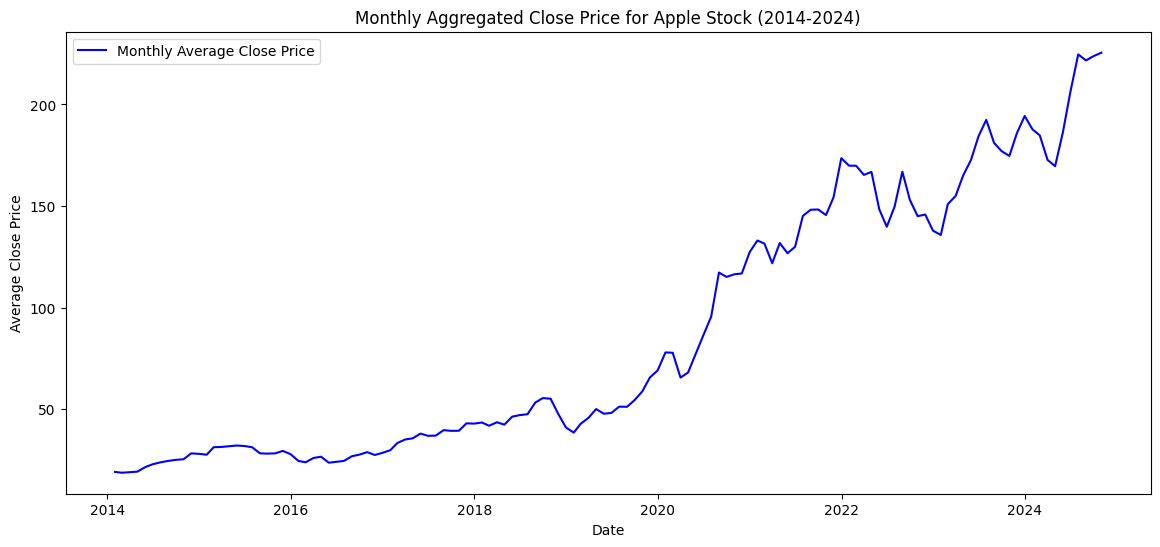

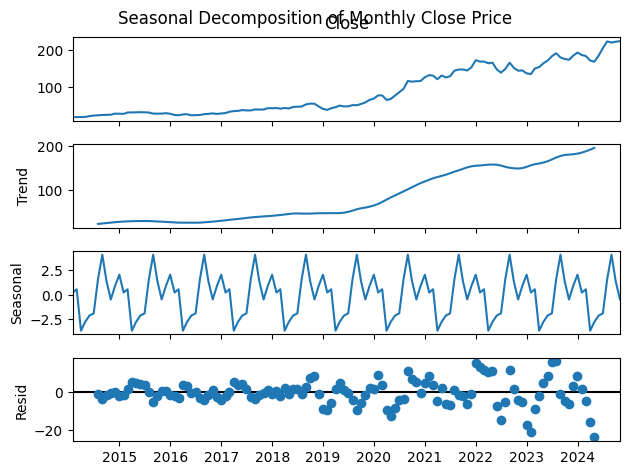

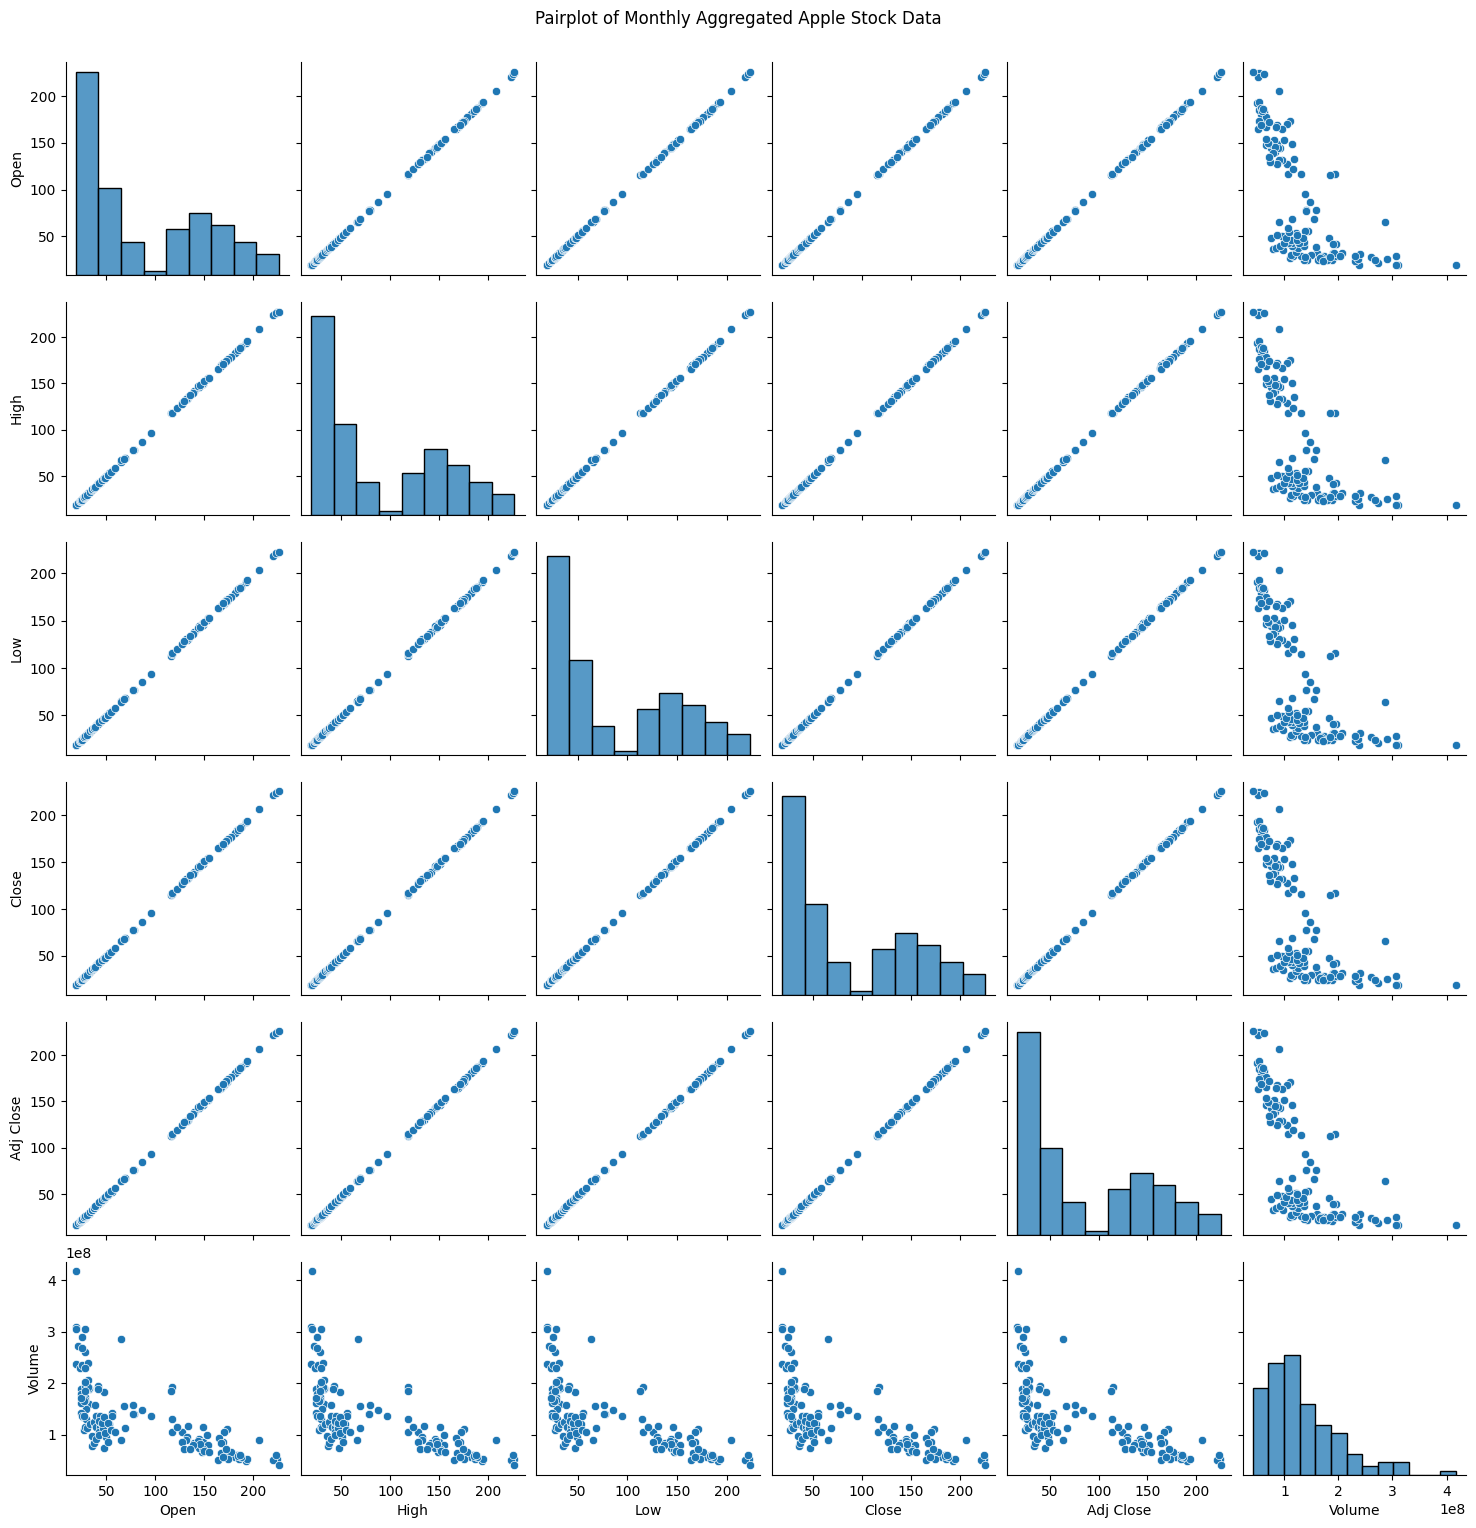

,Open,High,Low,Close,Adj Close,Volume
count,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,87.270848,88.193269,86.383380,87.329290,85.255337,1.309667e+08
std,63.527888,64.196338,62.867430,63.563812,64.074463,6.717516e+07
min,18.775752,18.956203,18.647368,18.806429,16.508462,4.139206e+07
25%,31.426108,31.627955,31.125369,31.391701,28.175920,8.439293e+07
50%,52.218654,52.771356,51.902468,52.320307,50.150517,1.146903e+08
75%,147.402468,148.927646,145.011903,147.594128,145.386137,1.615661e+08
max,226.589999,227.503998,223.108005,225.430002,225.430002,4.174264e+08


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Aggregating data monthly
monthly_data = data.resample('M').mean()


plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['Close'], label='Monthly Average Close Price', color='blue')
plt.title('Monthly Aggregated Close Price for Apple Stock (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

# Decomposing the time series to show seasonal patterns
decomposition = seasonal_decompose(monthly_data['Close'], model='additive')

# Plotting the decomposed components
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Monthly Close Price')
plt.show()

# Performing EDA on monthly aggregated data
sns.pairplot(monthly_data)
plt.suptitle('Pairplot of Monthly Aggregated Apple Stock Data', y=1.02)
plt.show()

# Displaying basic statistics
monthly_data_stats = monthly_data.describe()

monthly_data_stats


In [47]:
print(monthly_data_stats)

             Open        High         Low       Close   Adj Close  \
count  130.000000  130.000000  130.000000  130.000000  130.000000   
mean    87.270848   88.193269   86.383380   87.329290   85.255337   
std     63.527888   64.196338   62.867430   63.563812   64.074463   
min     18.775752   18.956203   18.647368   18.806429   16.508462   
25%     31.426108   31.627955   31.125369   31.391701   28.175920   
50%     52.218654   52.771356   51.902468   52.320307   50.150517   
75%    147.402468  148.927646  145.011903  147.594128  145.386137   
max    226.589999  227.503998  223.108005  225.430002  225.430002   

             Volume  
count  1.300000e+02  
mean   1.309667e+08  
std    6.717516e+07  
min    4.139206e+07  
25%    8.439293e+07  
50%    1.146903e+08  
75%    1.615661e+08  
max    4.174264e+08  


C:\Users\janan\AppData\Local\Temp\ipykernel_12672\2065221457.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(monthly_data.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', color='red')


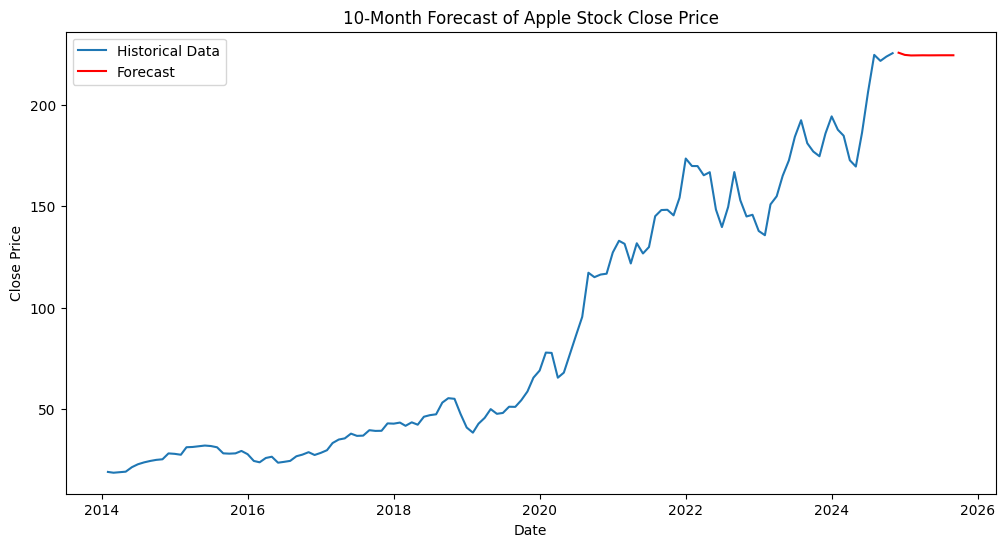

2024-11-30    225.660791
2024-12-31    224.587614
2025-01-31    224.314509
2025-02-28    224.349200
2025-03-31    224.394296
2025-04-30    224.370863
2025-05-31    224.386776
2025-06-30    224.404928
2025-07-31    224.409773
2025-08-31    224.405405
Freq: ME, Name: predicted_mean, dtype: float64

In [48]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(monthly_data['Close'], order=(5, 1, 0))
model_fit = model.fit()


forecast = model_fit.forecast(steps=10)


plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Close'], label='Historical Data')
plt.plot(pd.date_range(monthly_data.index[-1], periods=11, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('10-Month Forecast of Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

forecast

In [49]:

# !pip install --upgrade Cython
# !pip install --upgrade setuptools
# !pip install pystan==2.19.1.1

# !pip install prophet

23:19:27 - cmdstanpy - INFO - Chain [1] start processing
23:19:27 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\janan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


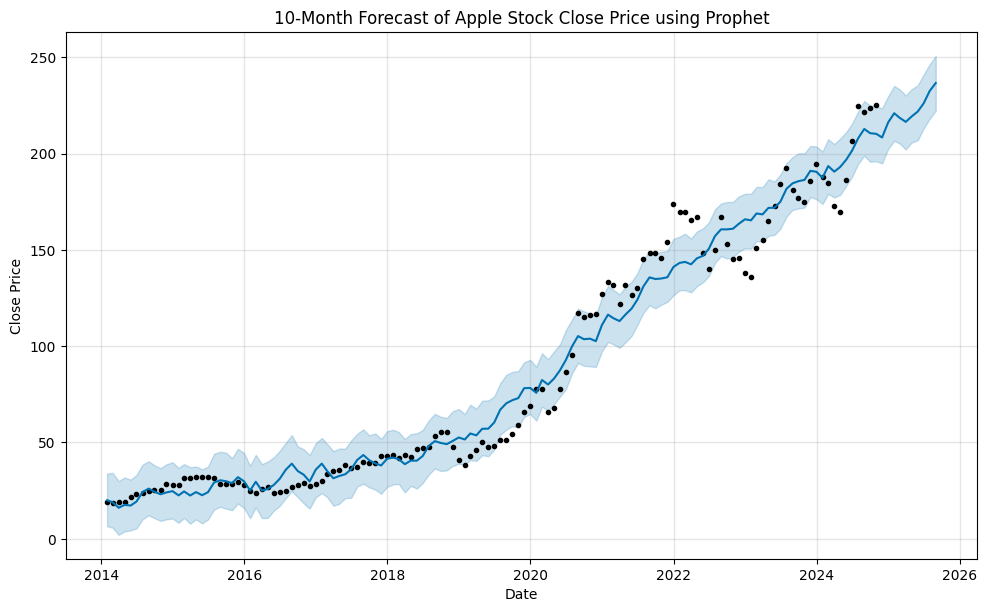

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-31,17.020980,6.508628,33.840911,17.020980,17.020980,2.929829,2.929829,2.929829,2.929829,2.929829,2.929829,0.0,0.0,0.0,19.950809
1,2014-02-28,17.434437,5.733445,34.228419,17.434437,17.434437,1.553934,1.553934,1.553934,1.553934,1.553934,1.553934,0.0,0.0,0.0,18.988371
2,2014-03-31,17.892194,2.055757,29.915021,17.892194,17.892194,-1.818675,-1.818675,-1.818675,-1.818675,-1.818675,-1.818675,0.0,0.0,0.0,16.073519
3,2014-04-30,18.335185,3.799680,31.784457,18.335185,18.335185,-0.757516,-0.757516,-0.757516,-0.757516,-0.757516,-0.757516,0.0,0.0,0.0,17.577669
4,2014-05-31,18.792942,4.321503,30.678504,18.792942,18.792942,-1.568108,-1.568108,-1.568108,-1.568108,-1.568108,-1.568108,0.0,0.0,0.0,17.224834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2025-04-30,221.247926,205.677184,233.364277,220.626392,221.771809,-2.024144,-2.024144,-2.024144,-2.024144,-2.024144,-2.024144,0.0,0.0,0.0,219.223781
136,2025-05-31,223.366615,206.871454,235.390570,222.520074,224.043377,-1.588332,-1.588332,-1.588332,-1.588332,-1.588332,-1.588332,0.0,0.0,0.0,221.778284
137,2025-06-30,225.416960,212.987858,240.970412,224.333185,226.255211,0.570949,0.570949,0.570949,0.570949,0.570949,0.570949,0.0,0.0,0.0,225.987909
138,2025-07-31,227.535650,218.017761,246.281007,226.191384,228.527428,4.912226,4.912226,4.912226,4.912226,4.912226,4.912226,0.0,0.0,0.0,232.447876


In [50]:
from prophet import Prophet


prophet_data = monthly_data.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_data)

future_dates = model.make_future_dataframe(periods=10, freq='M')

forecast = model.predict(future_dates)

fig = model.plot(forecast)
plt.title('10-Month Forecast of Apple Stock Close Price using Prophet')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
forecast


The plot generated by the Prophet model provides a visual representation of the historical Apple stock data, as well as the model's forecast for the next 10 months. Here’s an explanation of each element on the plot:

### Explanation of the Plot:
1. **Black Dots (Observed Data)**:
   - The black dots represent the actual, historical observed close prices of the Apple stock from 2014 to 2024. These points provide a visual record of how the stock price has evolved over time.

2. **Blue Line (Forecasted Line)**:
   - The solid blue line represents the predicted values (the `yhat` column) generated by the Prophet model. It shows the model's best estimate for the closing prices of Apple stock over the forecast period (in this case, 10 months into 2024).

3. **Light Blue Shaded Area (Uncertainty Interval)**:
   - The shaded blue region around the forecasted line represents the confidence interval (typically 80% or 95%) of the forecast. This interval, depicted by the `yhat_lower` and `yhat_upper` columns, indicates the range within which the model predicts the actual stock prices are likely to fall. A wider shaded area suggests greater uncertainty in the forecast, while a narrower area indicates higher confidence.

### Interpretation:
- **Trend and Seasonality**: The blue line follows an upward trend, suggesting that the model anticipates the Apple stock prices to continue rising over the forecast period. The small fluctuations and curvature in the line indicate the model's understanding of seasonal patterns in the data.
- **Confidence Interval Significance**: The light blue area helps convey the uncertainty of the forecast. If the shaded region is narrow, the model is confident in its predictions; if it is wide, the model has lower confidence and there is more uncertainty about where the actual prices might land.
- **Model Accuracy and Observed Data**: Comparing the blue line (forecast) with the black dots (actual data) up to the present gives an idea of how well the model fits the historical data. If the blue line closely aligns with the black dots, the model has learned the data's trend and seasonality well.

### Key Takeaways:
- **Overall Upward Trend**: The blue line indicates that the Prophet model predicts an upward trend in Apple stock prices for the next 10 months.
- **Predictive Range**: The light blue confidence interval shows the expected range where the actual stock prices may fall, providing a measure of uncertainty in the prediction.
- **Historical Fit**: By seeing how the forecast line aligns with past observed data (the black dots), you can assess how effectively the model has captured historical trends and seasonality.

This plot is useful for visualizing not just the central forecast but also the uncertainty, which is important for understanding the risk and reliability of predictions in financial forecasting.

In [51]:
# print(data.describe())
# print(data.head())
# print(data.tail())
# print(data.dtypes)
# print(data.isnull().sum())
# print(data.corr())


C:\Users\janan\AppData\Local\Temp\ipykernel_12672\2434100541.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_LR'] = lr_model.predict(test[features])


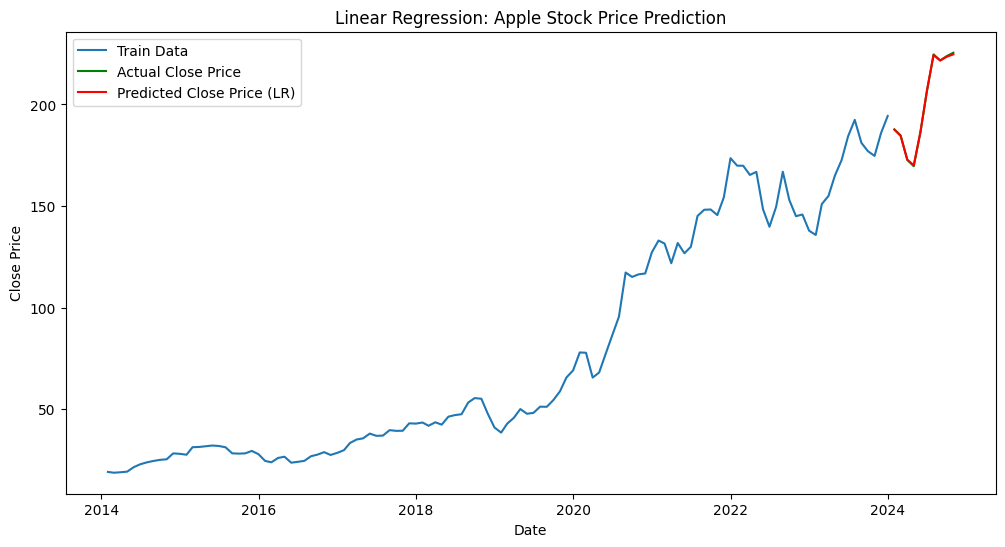

In [52]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


train = monthly_data[:'2023']
test = monthly_data['2024':]

features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'


lr_model = LinearRegression()
lr_model.fit(train[features], train[target])


test['Pred_LR'] = lr_model.predict(test[features])

plt.figure(figsize=(12, 6))
plt.plot(train.index, train[target], label='Train Data')
plt.plot(test.index, test[target], label='Actual Close Price', color='green')
plt.plot(test.index, test['Pred_LR'], label='Predicted Close Price (LR)', color='red')
plt.title('Linear Regression: Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


C:\Users\janan\AppData\Local\Temp\ipykernel_12672\180571813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_DT'] = dt_model.predict(test[features])


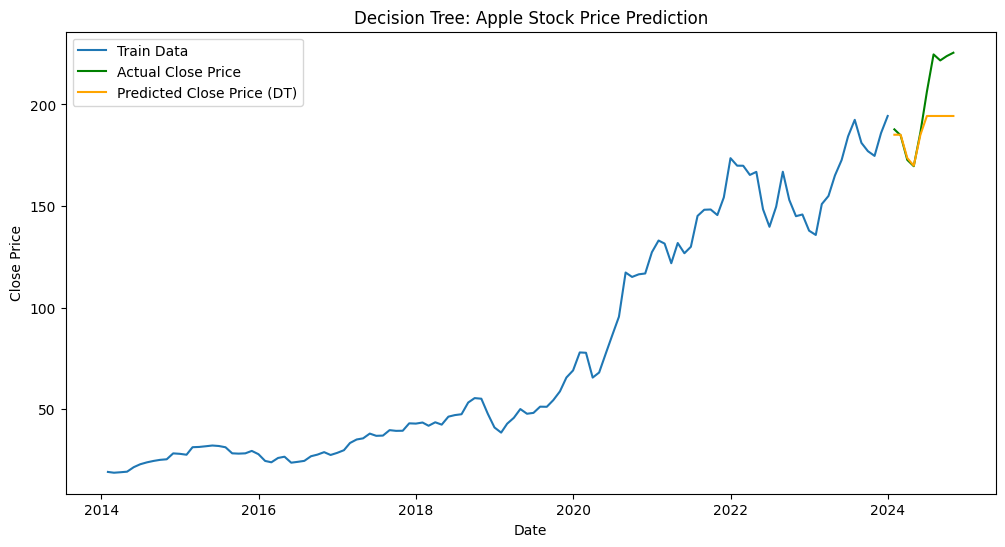

In [53]:
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(train[features], train[target])


test['Pred_DT'] = dt_model.predict(test[features])

plt.figure(figsize=(12, 6))
plt.plot(train.index, train[target], label='Train Data')
plt.plot(test.index, test[target], label='Actual Close Price', color='green')
plt.plot(test.index, test['Pred_DT'], label='Predicted Close Price (DT)', color='orange')
plt.title('Decision Tree: Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


C:\Users\janan\AppData\Local\Temp\ipykernel_12672\1428318613.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_RF'] = rf_model.predict(test[features])


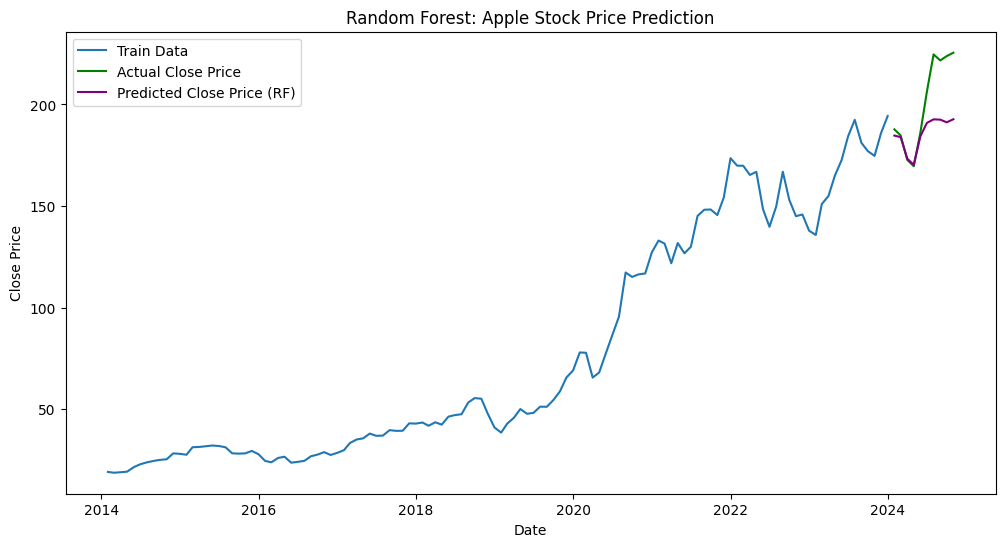

In [54]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(train[features], train[target])


test['Pred_RF'] = rf_model.predict(test[features])

plt.figure(figsize=(12, 6))
plt.plot(train.index, train[target], label='Train Data')
plt.plot(test.index, test[target], label='Actual Close Price', color='green')
plt.plot(test.index, test['Pred_RF'], label='Predicted Close Price (RF)', color='purple')
plt.title('Random Forest: Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



C:\Users\janan\AppData\Local\Temp\ipykernel_12672\2844409293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_XGB'] = xgb_model.predict(test[features])


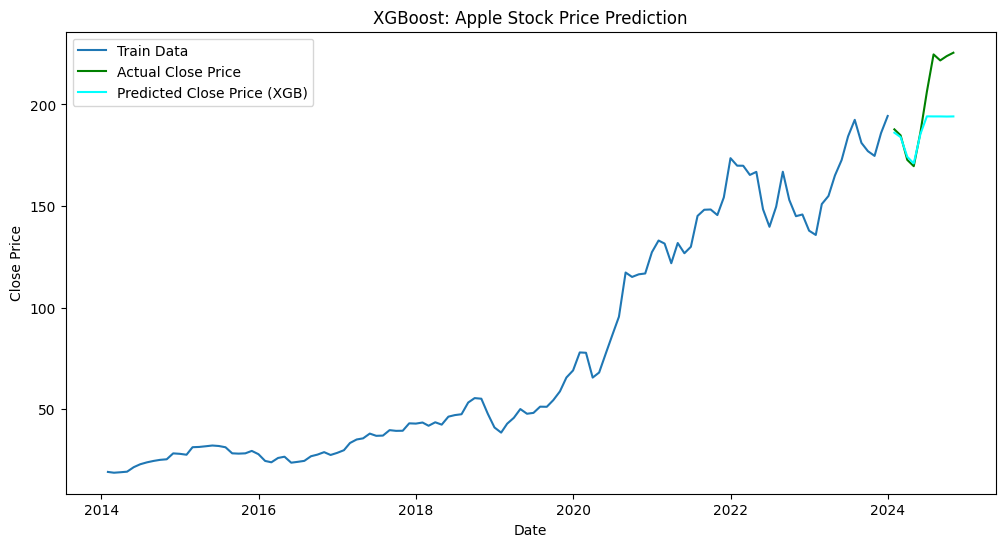

In [55]:
from xgboost import XGBRegressor


xgb_model = XGBRegressor(n_estimators=100, max_depth=5, random_state=42)
xgb_model.fit(train[features], train[target])


test['Pred_XGB'] = xgb_model.predict(test[features])

plt.figure(figsize=(12, 6))
plt.plot(train.index, train[target], label='Train Data')
plt.plot(test.index, test[target], label='Actual Close Price', color='green')
plt.plot(test.index, test['Pred_XGB'], label='Predicted Close Price (XGB)', color='cyan')
plt.title('XGBoost: Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


C:\Users\janan\AppData\Local\Temp\ipykernel_12672\1530043594.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred_SVR'] = svr_model.predict(test_scaled)


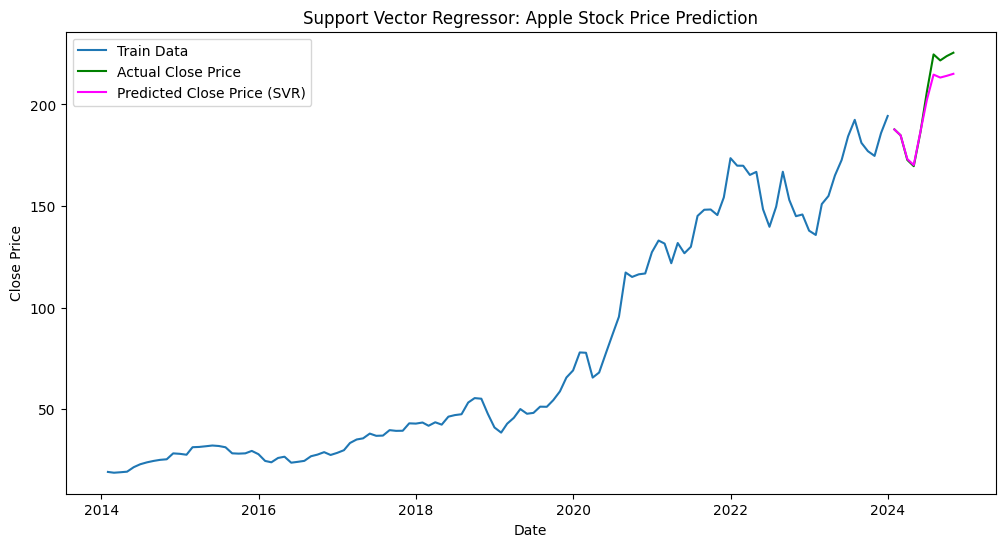

In [56]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])


svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(train_scaled, train[target])


test['Pred_SVR'] = svr_model.predict(test_scaled)


plt.figure(figsize=(12, 6))
plt.plot(train.index, train[target], label='Train Data')
plt.plot(test.index, test[target], label='Actual Close Price', color='green')
plt.plot(test.index, test['Pred_SVR'], label='Predicted Close Price (SVR)', color='magenta')
plt.title('Support Vector Regressor: Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


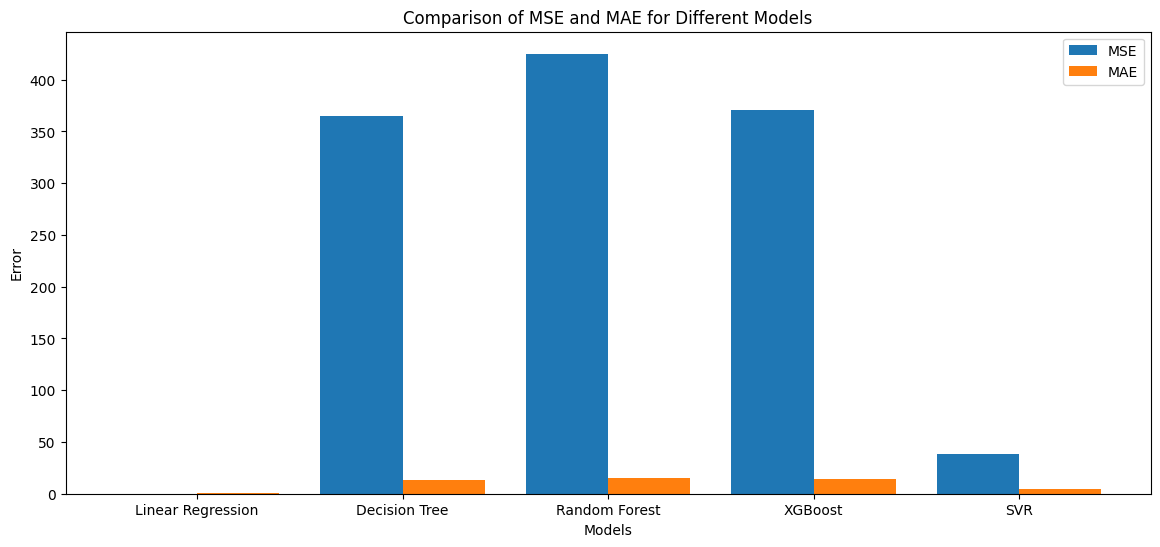

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


metrics = {}


mse_lr = mean_squared_error(test[target], test['Pred_LR'])
mae_lr = mean_absolute_error(test[target], test['Pred_LR'])
metrics['Linear Regression'] = {'MSE': mse_lr, 'MAE': mae_lr}


mse_dt = mean_squared_error(test[target], test['Pred_DT'])
mae_dt = mean_absolute_error(test[target], test['Pred_DT'])
metrics['Decision Tree'] = {'MSE': mse_dt, 'MAE': mae_dt}


mse_rf = mean_squared_error(test[target], test['Pred_RF'])
mae_rf = mean_absolute_error(test[target], test['Pred_RF'])
metrics['Random Forest'] = {'MSE': mse_rf, 'MAE': mae_rf}


mse_xgb = mean_squared_error(test[target], test['Pred_XGB'])
mae_xgb = mean_absolute_error(test[target], test['Pred_XGB'])
metrics['XGBoost'] = {'MSE': mse_xgb, 'MAE': mae_xgb}


mse_svr = mean_squared_error(test[target], test['Pred_SVR'])
mae_svr = mean_absolute_error(test[target], test['Pred_SVR'])
metrics['SVR'] = {'MSE': mse_svr, 'MAE': mae_svr}


models = list(metrics.keys())
mse_values = [metrics[model]['MSE'] for model in models]
mae_values = [metrics[model]['MAE'] for model in models]

x = range(len(models))

plt.figure(figsize=(14, 6))


plt.bar(x, mse_values, width=0.4, label='MSE', align='center')

plt.bar([p + 0.4 for p in x], mae_values, width=0.4, label='MAE', align='center')

plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and MAE for Different Models')
plt.xticks([p + 0.2 for p in x], models)
plt.legend()
plt.show()


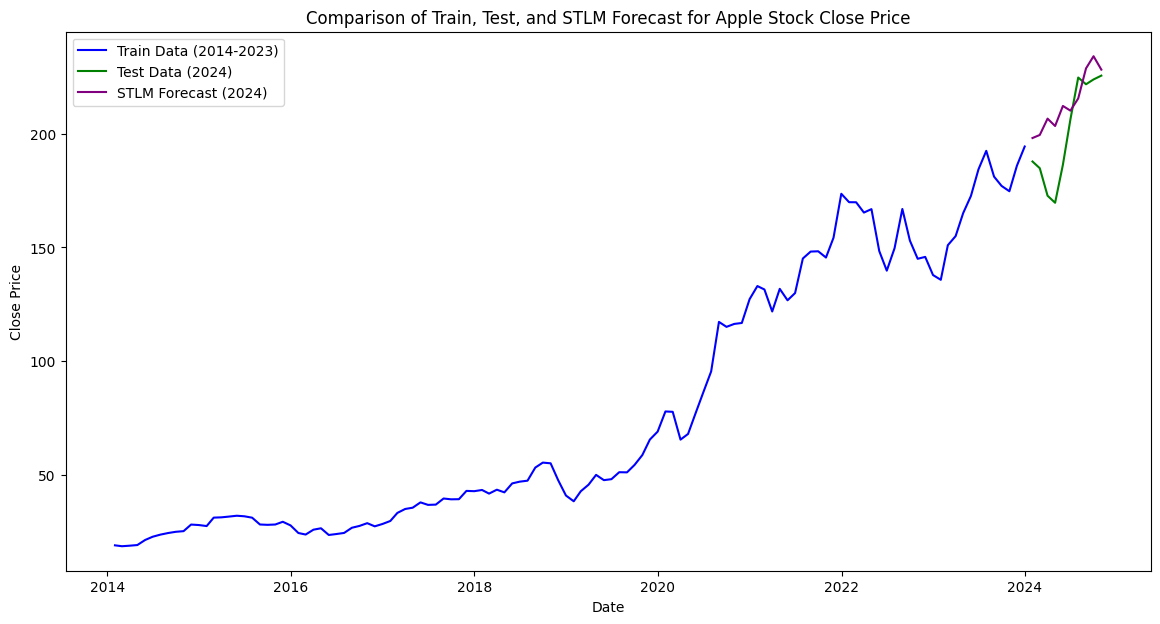

STLM Forecast for 2024:
2024-01-31    198.035435
2024-02-29    199.378678
2024-03-31    206.547630
2024-04-30    203.314321
2024-05-31    212.120006
2024-06-30    210.057366
2024-07-31    215.420363
2024-08-31    228.605060
2024-09-30    233.951497
2024-10-31    228.064201
Freq: ME, dtype: float64


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train_data = monthly_data.loc[:'2023-12-31']
test_data = monthly_data.loc['2024-01-01':]

stl = STL(train_data['Close'], seasonal=13)
result = stl.fit()

trend_model = ExponentialSmoothing(result.trend, trend='add', seasonal=None).fit()
trend_forecast = trend_model.forecast(len(test_data))

seasonal_forecast = list(result.seasonal[-13:]) * 2 
seasonal_forecast = seasonal_forecast[:len(test_data)] 

stlm_forecast = trend_forecast + seasonal_forecast

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, stlm_forecast, label='STLM Forecast (2024)', color='purple')
plt.title('Comparison of Train, Test, and STLM Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

print("STLM Forecast for 2024:")
print(stlm_forecast)



23:19:31 - cmdstanpy - INFO - Chain [1] start processing
23:19:31 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\janan\AppData\Local\Temp\ipykernel_12672\2786497976.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range('2024-01-01', periods=10, freq='M')


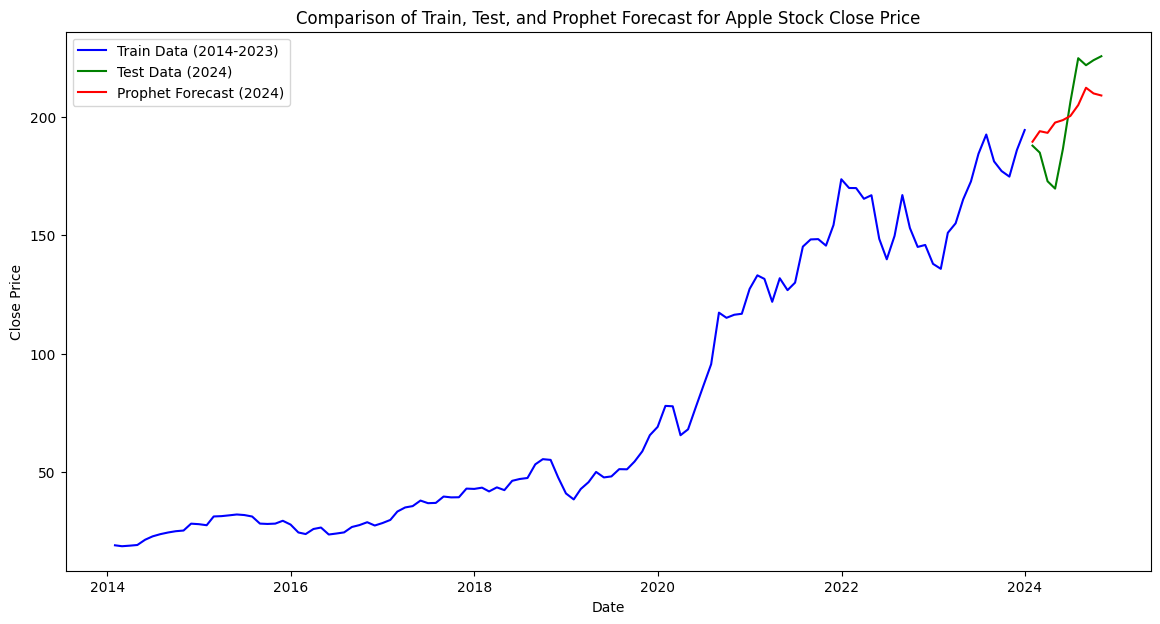

In [59]:
from prophet import Prophet

prophet_data = train_data.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_data)

future_dates = pd.date_range('2024-01-01', periods=10, freq='M')
future = pd.DataFrame({'ds': future_dates})

prophet_forecast = prophet_model.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(future['ds'], prophet_forecast['yhat'], label='Prophet Forecast (2024)', color='red')
plt.title('Comparison of Train, Test, and Prophet Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


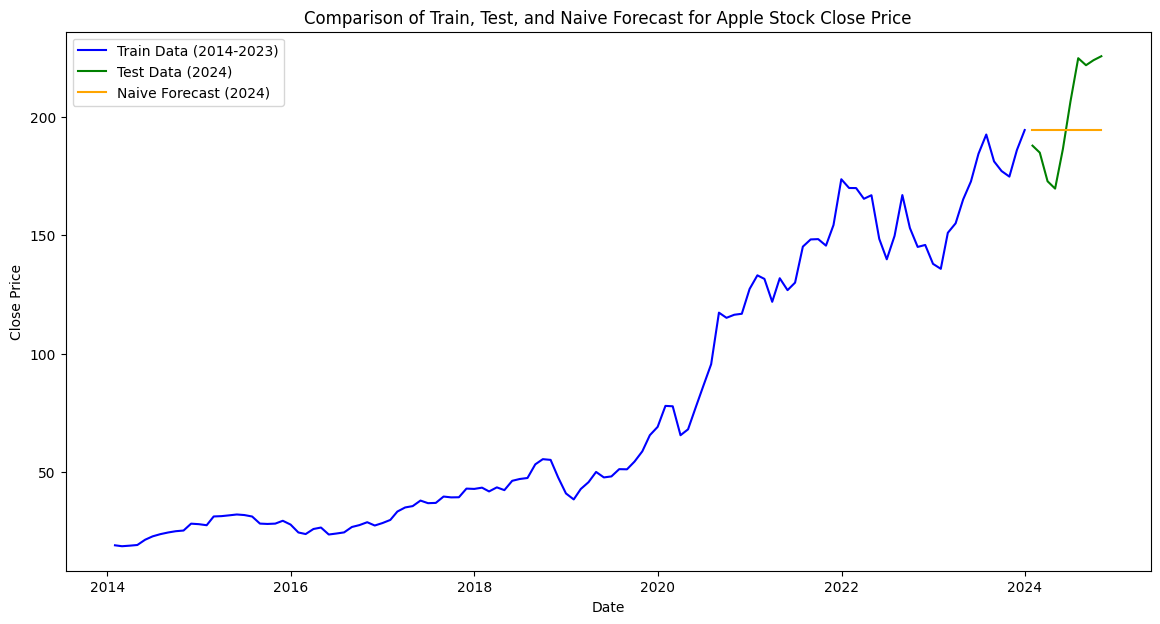

In [60]:

naive_forecast = np.repeat(train_data['Close'].iloc[-1], len(test_data))


plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, naive_forecast, label='Naive Forecast (2024)', color='orange')
plt.title('Comparison of Train, Test, and Naive Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()




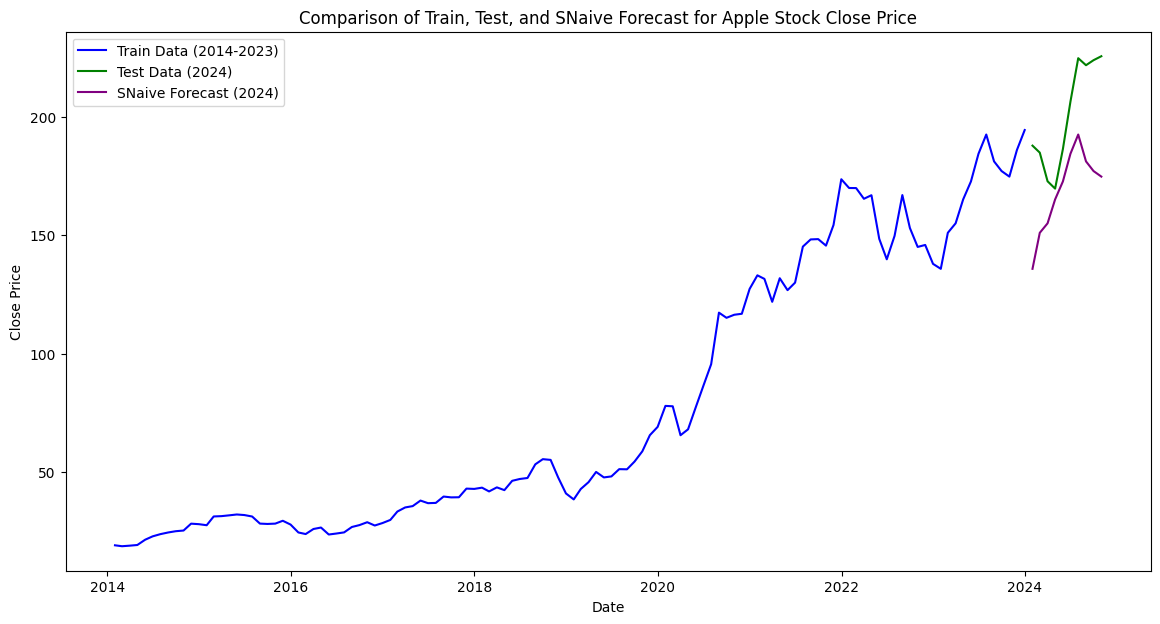

In [61]:

season_length = 12  # Monthly data (1 year seasonality)
snaive_forecast = train_data['Close'].iloc[-season_length:].values

snaive_forecast = np.tile(snaive_forecast, int(np.ceil(len(test_data) / season_length)))[:len(test_data)]

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Train Data (2014-2023)', color='blue')
plt.plot(test_data.index, test_data['Close'], label='Test Data (2024)', color='green')
plt.plot(test_data.index, snaive_forecast, label='SNaive Forecast (2024)', color='purple')
plt.title('Comparison of Train, Test, and SNaive Forecast for Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()



In [62]:
# # Import necessary libraries
# import pandas as pd
# import matplotlib.pyplot as plt
# from prophet import Prophet

# # Prepare the data for Prophet
# # Replace 'train_data' with your actual training DataFrame containing 'Date' and 'Close' columns
# prophet_data = train_data.reset_index()[['Date', 'Close']]
# prophet_data.columns = ['ds', 'y']  # Prophet requires the columns to be named 'ds' (date) and 'y' (value)

# # Initialize and train the Prophet model
# prophet_model = Prophet(yearly_seasonality=True)
# prophet_model.fit(prophet_data)

# # Create a future DataFrame only for past data to visualize the components
# future = prophet_model.make_future_dataframe(periods=0)  # No additional periods needed for components plot

# # Forecast on the past data to get seasonal components
# forecast = prophet_model.predict(future)

# # Plot the components, including the monthly seasonality
# fig = prophet_model.plot_components(forecast)
# plt.show()

# # Customizing the model to focus on monthly seasonality
# # Adding a specific monthly seasonality
# prophet_model = Prophet(yearly_seasonality=False)  # Disable default yearly seasonality if needed
# prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
# prophet_model.fit(prophet_data)

# # Forecast on past data with custom seasonality
# forecast = prophet_model.predict(future)

# # Plot the components with custom monthly seasonality included
# fig = prophet_model.plot_components(forecast)
# plt.show()


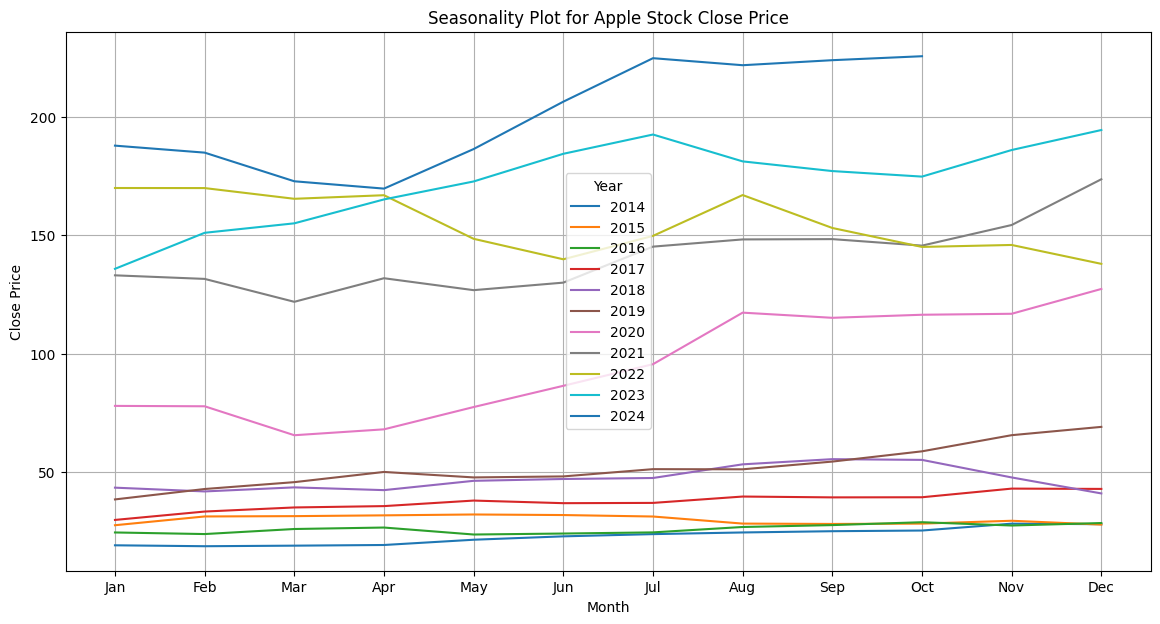

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data['Month'] = data.index.month
data['Year'] = data.index.year

seasonal_data = data.pivot_table(values='Close', index='Month', columns='Year')

plt.figure(figsize=(14, 7))
for year in seasonal_data.columns:
    plt.plot(seasonal_data.index, seasonal_data[year], label=year)

plt.title('Seasonality Plot for Apple Stock Close Price')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()


Yes, the seasonality plot of the Apple stock close price for each year indicates some level of seasonality in certain periods:

1. **General Uptrend in Certain Months**:
   - Some years, such as 2020 and 2023, show a clear upward trend from June to December. This could indicate a seasonal effect where Apple stock prices tend to increase in the latter half of the year.
   
2. **Early Year Decline**:
   - For certain years like 2022 and 2024, there is a slight decline or plateau from January to March or April, which might suggest that the start of the year often sees less aggressive stock price growth.

3. **Yearly Differences**:
   - There is a noticeable variance across different years. For instance, 2018 has a fairly stable trend throughout the year, while 2021 shows a steady increase, highlighting that some years exhibit stronger seasonality than others.

4. **Mid-Year Behavior**:
   - The mid-year months (around June to August) often show mixed trends. For some years, like 2019 and 2016, there is a decrease or leveling off, while in other years (e.g., 2021), there is a noticeable increase.

**Conclusion**:
- While there is some evidence of seasonal patterns in the Apple stock close prices, the level of seasonality can vary significantly year-to-year. In general, the latter part of the year seems to show an increase in prices for multiple years, indicating a potential seasonal trend.
- It’s important to consider other factors like market conditions and events that could also impact these trends.

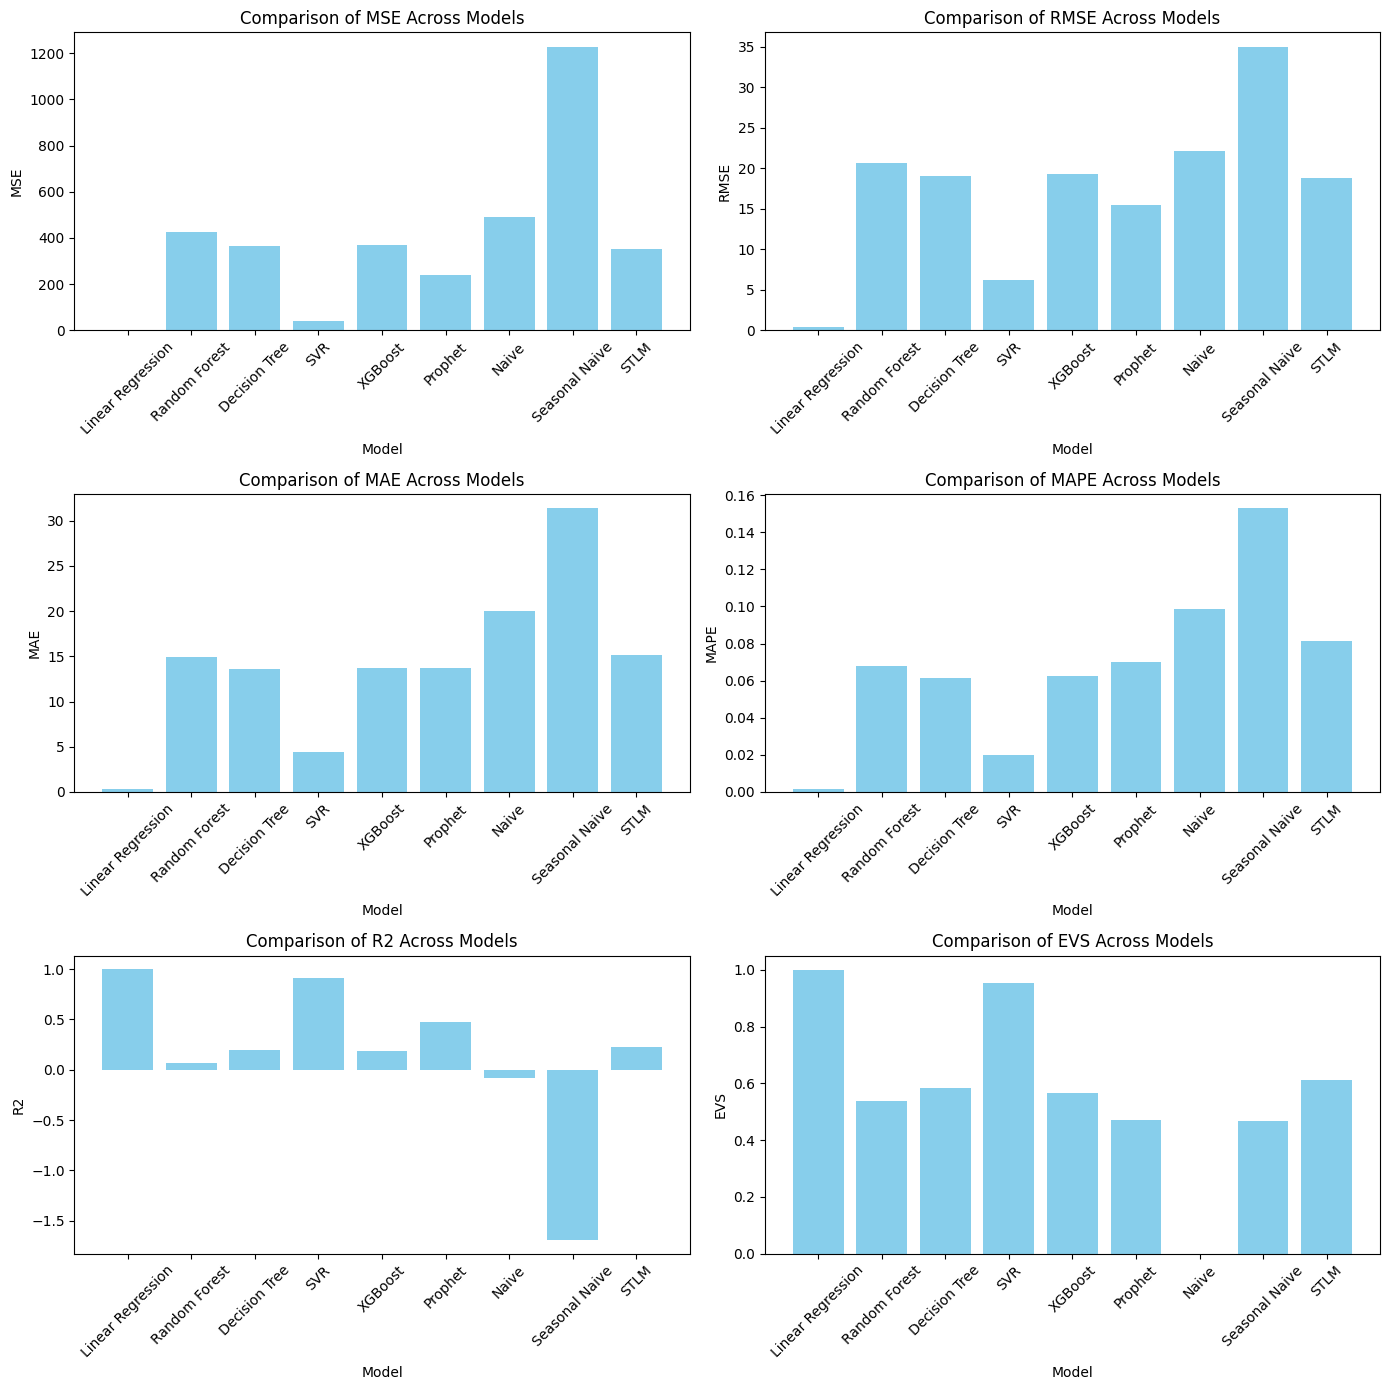

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, explained_variance_score

def evaluate_model(y_true, y_pred, model_name):
    
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    
    return {
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape,
        "R2": r2,
        "EVS": evs
    }

def plot_metrics_grid(metrics_list):
    metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2", "EVS"]
    
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 14))
    axes = axes.flatten()  
    
    for i, metric in enumerate(metric_names):
        axes[i].bar([m["Model"] for m in metrics_list], [m[metric] for m in metrics_list], color='skyblue')
        axes[i].set_title(f"Comparison of {metric} Across Models")
        axes[i].set_xlabel("Model")
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()


models_metrics = []
models_metrics.append(evaluate_model(test['Close'], test['Pred_LR'], "Linear Regression"))
models_metrics.append(evaluate_model(test['Close'], test['Pred_RF'], "Random Forest"))
models_metrics.append(evaluate_model(test['Close'], test['Pred_DT'], "Decision Tree"))
models_metrics.append(evaluate_model(test['Close'], test['Pred_SVR'], "SVR"))
models_metrics.append(evaluate_model(test['Close'], test['Pred_XGB'], "XGBoost"))
models_metrics.append(evaluate_model(test['Close'], prophet_forecast['yhat'], "Prophet"))
models_metrics.append(evaluate_model(test['Close'], naive_forecast, "Naive"))
models_metrics.append(evaluate_model(test['Close'], snaive_forecast, "Seasonal Naive"))
models_metrics.append(evaluate_model(test['Close'], stlm_forecast, "STLM"))

plot_metrics_grid(models_metrics)


In [78]:
# train.index
print(train['Close'].head(1))
print(train['Close'].tail(1))

print(test[['Close','Pred_LR','Pred_SVR']].head(1))
print(test[['Close','Pred_LR','Pred_SVR']].tail(1))

print(prophet_forecast['yhat'].head(1))
print(prophet_forecast['yhat'].tail(1))


Date
2014-01-31    19.19449
Freq: ME, Name: Close, dtype: float64
Date
2023-12-31    194.308501
Freq: ME, Name: Close, dtype: float64
                 Close     Pred_LR    Pred_SVR
Date                                          
2024-01-31  187.724284  187.557389  187.664882
                 Close     Pred_LR    Pred_SVR
Date                                          
2024-10-31  225.430002  224.621059  215.051052
0    189.375708
Name: yhat, dtype: float64
9    208.871555
Name: yhat, dtype: float64
